In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
times = ["05", "075", "10", "125", "15", "175", "20", "225"]
stops = np.linspace(10**19, 10**20, 3)

In [3]:
dfs = []

for i in range(len(times)):
    names = ["depth","doping"]
    df = pd.read_csv(r"C:\Users\Phili\OneDrive\Skrivebord\Skole\DTU\Fysik og Nanoteknologi\22600 Fabrication of micro- and nanostructures\Project\Process Simulation\extract_" + times[i] + "_2e20.dat",
                header=None,
                sep=" ",
                 names = names,
                skiprows=4
                )
    dfs.append(df)


In [4]:
def func(t, k, t0):
    #return np.sqrt(k*(t + t0))
    return k*t + t0

In [5]:
ts = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0, 2.25]) * 60

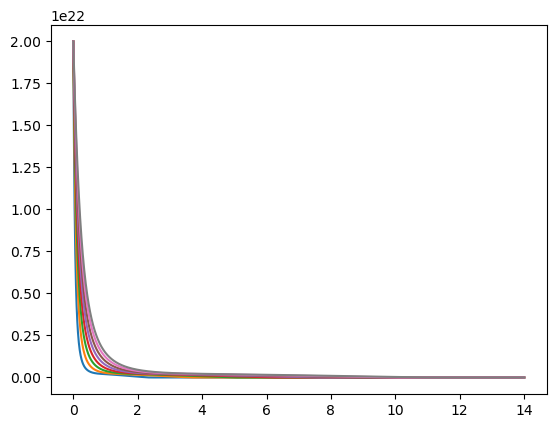

In [6]:
for i in range(len(times)):

        depth = dfs[i].depth.to_numpy()
        doping = dfs[i].doping.to_numpy()
        plt.plot(depth,doping)

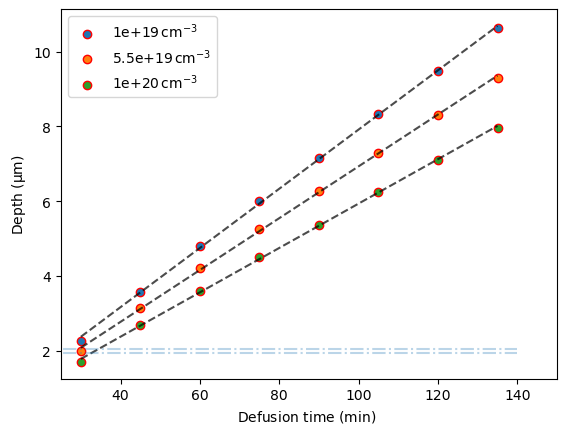

In [7]:
fig, ax = plt.subplots()
filled_marker_style = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='brown')
new_ts = np.linspace(ts[0], ts[-1], 1000)
ps = [] 
for j in range(len(stops)):
    ys = []
    for i in range(len(times)):

        depth = dfs[i].depth.to_numpy()
        doping = dfs[i].doping.to_numpy()
        index = np.argmin(np.abs(np.array(doping)-stops[j]))
        #print(doping[index])
        #print(depth[index])
        ys.append(depth[index])
    
    popt, pcov = curve_fit(func, ts, ys)
    ans = func(new_ts, popt[0], popt[1])
    p = ax.scatter(ts, ys, marker="o", edgecolors="r", alpha=1)
    ps.append(p)
    fit = ax.plot(new_ts, ans, linestyle ="--", color="black", alpha=.7)
    
ax.hlines(y=2+2*0.025, xmin=20, xmax=140, linestyles="-.", alpha=0.3)
ax.hlines(y=2-2*0.025, xmin=20, xmax=140, linestyles="-.", alpha=0.3)
plt.xlabel(r"Defusion time ($\mathrm{min}$)  ")
plt.ylabel(r"Depth ($\mathrm{\mu m }$)")
ax.legend([ps[0], ps[1], ps[2]], [str(stops[0]) + r"$\,\mathrm{cm}^{-3}}$",str(stops[1]) + r"$\,\mathrm{cm}^{-3}}$",str(stops[2]) + r"$\,\mathrm{cm}^{-3}}$"])
plt.xlim(25, 150)
plt.show()
fig.savefig(r'C:\Users\Phili\OneDrive\Skrivebord\Skole\DTU\Fysik og Nanoteknologi\22600 Fabrication of micro- and nanostructures\Project\Process Simulation\figures\depth.png', dpi=350,bbox_inches = "tight")

In [7]:
ts

array([ 30.,  45.,  60.,  75.,  90., 105., 120., 135.])